# Previsão para Insuficiência Cardíaca

## Contexto

Doenças cardiovasculares (DCV) estão como a primeira cusa de morte por todo o globo, ceifando cerca de 17,9 milhões de vidas por ano; isso é entorno de 31% das mortes anuais. Quatro das cinco mortes por DCV são devidas ao ataque cardíaco e derrames, sendo que um terço das mortes ocorre em pacientes com menos de 70 anos. Insuficiência cardíaca é o evento mais comum para DCV e o banco de dados usado nesse estudo possui 11 recursos que podem ser usados para prever uma possível doença cardíaca.

Pessoas com DCV ou com alto risco cardiovascular (devido a presença de um ou mais fatores de risco como hipertensão, diabetes, hiperlipidemia -altos níveis de gordura no sangue- ou alguma doença pré-estabelecida) precisam detectar e monitorar previamente, em que um modelo de aprendizado de máquina pode ser de grande ajuda.

## Informações do banco de dados

O banco de dados usado possui os seguintes dados:

1. Age: Idade do paciente (anos);


2. Sex: Sexo do paciente (**M**: Masculino, **F**: Feminino);


3. ChestPainType: Tipo de dor no peito (**TA**: Angina típica, **ATA**: Angina atípica, **NAP**: Dor não anginal, **ASY**: Assintomático);


4. RestingBP: Pressão arterial em repouso (mmHg, somente a pressão sistólica);


5. Cholesterol: Colesterol sérico (mm/dL);


6. FastingBS: Teste de glicemia após a injetão de glicose (**1**: se maior que 120 mg/dL, **0**: se menor que 120 mg/dL);


7. RestingECG: Resultado de eletrocardiograma em repouso (**Normal**: Normal, **ST**: onda ST-T anormal (inversões de onda T e/ou elevação ou depressão de ST maior que 0.05mV), **LVH**: provável ou definitiva hipertrofia ventricular esquerda pelo critério de Estes);


8. MaxHR: Batimento cardíaco máximo (valor numérico entre 60 e 202);


9. ExerciseAngina: Exercício físico induz angina (**Y**: Sim, **N**: Não);


10. Oldpeak: Valor numérico medido na depressão do segmento ST;


11. ST_Slope: A inclinação do segmento ST de exercício de pico (**Up**: inclinação para cima, **Flat**: o segmento se mantém paralelo ao eixo X, **Down**: inclinação para baixo) e;


12. HeartDisease: classe de saída (**1**: DCV, **0**: Normal).

## Fonte

Esse banco de dados foi criado pela combinação de diferentes dados avaliados idependentemente, mas nunca combinados anteriormente. Nesse conjunto de dados, 5 banco de dados são combinados em 11 características comuns, o que o torna o maior conjunto de dados de DCV disponível até o momento para fins de pesquisa. Os cinco conjunto de dados para a curadoria são:

- Cleveland: 303 observações;


- Hungria: 294 observações;


- Suíça: 123 observações;


- Long Beach VA: 200 observações e;


- Conjunto de dados Statlog (Heart) [UCI]: 270 observações

Total: 1190 observações

Duplicados: 272 observações

**Conjunto de dados final: 918 observações**

## Vamos codar!!!

### 1. Importar o banco de dados

Primeiramente, devemos importar o banco de dados. Para isso, acesse o link https://www.kaggle.com/fedesoriano/heart-failure-prediction, clique no botão *Download (36kB)*, abra o arquivo **.rar** e coloque o arquivo **.cvs** na mesma pasta que o Notebook Jupyter (vale lembrar que para baixar o arquivo no Kaggle é necessário estar logado na plataforma). Feito isso, vamos dar uma olhada no conjunto de dados.

In [1]:
# Importar a biblioteca pandas para acessar o banco de dados
import pandas as pd

In [2]:
# Informar o arquivo usado
arquivo = 'heart.csv'

# Criar o DataFrame
dados = pd.read_csv(arquivo)

# Mostrar o conjunto de dados
dados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Como podemos ver, o conjunto de dados possui 918 observações (lembre-se que a contagem no Python começa no 0) e 12 colunas. A última coluna é o resultado da análise das outras 11, ou seja, é essa última coluna que diz se o paciente tem (1) ou não (0) alguma doença cardiovascular (DCV).

O próximo passo agora é ajeitar os dados para que fique fácil o seu manuseio.

### 2. Renomear as colunas

Como o nome das colunas está em inglês e estamos no Brasil, nada melhor do que renomear as colunas para saber o que cada uma carrega de informação. Para isso, usaremos a função **.rename()** em nosso objeto **DataFrame**.

In [3]:
# Para renomear as colunas do DataFrame, é necessário armazenar esse "novo" DataFrame em uma variável
# Além disso, dentro da função deve-se passar para o parêmetro "columns" um dicionário, onde as chaves são os
# nomes das colunas do DataFrame e os valores os novos nomes
trocar_nomes = {'Age': 'Idade', 'Sex': 'Sexo', 'ChestPainType': 'Tipo de dor', 'RestingBP': 'Pressão',
               'Cholesterol': 'Colesterol', 'FastingBS': 'Glicemia', 'RestingECG': 'Eletro', 'MaxHR': 'BPM',
               'ExerciseAngina': 'Dor por exec.', 'ST_Slope': 'Incl. ST', 'HeartDisease': 'DCV'}

# Realizar a troca dos nomes das colunas
dados = dados.rename(columns=trocar_nomes)

# Mostrar o conjunto de dados
dados

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,Oldpeak,Incl. ST,DCV
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Conseguimos trocar os nomes das colunas. Agora devemos verificar se todas as colunas possuem dados, uma vez que colunas com dados vazios não ajudam em nada e só atrapalham. Além disso, vamos verificar se o tipo de dado de cada coluna está de acordo com os dados que elas armazenam. Por exemplo, um número fltuante armazenado como uma **string** e não como **float**.

Para isso, chame a função **info()** no objeto **DataFrame**.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          918 non-null    int64  
 1   Sexo           918 non-null    object 
 2   Tipo de dor    918 non-null    object 
 3   Pressão        918 non-null    int64  
 4   Colesterol     918 non-null    int64  
 5   Glicemia       918 non-null    int64  
 6   Eletro         918 non-null    object 
 7   BPM            918 non-null    int64  
 8   Dor por exec.  918 non-null    object 
 9   Oldpeak        918 non-null    float64
 10  Incl. ST       918 non-null    object 
 11  DCV            918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 3. Tratamento de dados

Como podemos ver, não há valores vazios e os dados estão de acordo com com o tipo que devem ser. Mas será que os valores de cada coluna estão de acordo com a realidade? Pense o seguinte: Será que existem dados de pressão negativa? Ou será que existe um valor de BPM maior do que 300? Para resolver essas questões (ou qualquer outra que você possa ter pensado), chame a função **describe()** do objeto **DataFrame**. Além disso, use a função **.T** para que o que é coluna vire índice e o que é índice vire coluna, dessa maneira fica mais fácil a visualzação da tabela retornada.

In [5]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Pressão,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Colesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
Glicemia,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
BPM,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
DCV,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Como podemos ver na coluna **min**, tanto **Pressão** como **Colesterol** possuem um dado com o valor de 0. Como sabemos, é impossível que uma pessoa possa estar viva com pressão arterial em 0 mmHg e 0 mm/dL de colesterol. Como esses dois valores são outliers, vamos retirá-los do nosso conjunto de dados.

In [6]:
# Excluir as linhas que possuem o valor de colesterol igual a 0
dados = dados[dados['Colesterol'] != 0]

# Excluir as linhas que possuem o valor de pressão arterial igual a 0
dados = dados[dados['Pressão'] != 0]

Excluido os dados que atrapalhariam a nossa análise, vejamos como os dados ficaram.

In [7]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
Pressão,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Colesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
Glicemia,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
BPM,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
DCV,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


Agora os dados estão de acordo com a realidade. Porém, será que temos valores únicos em cada coluna? Pense o seguinte: Será que existe uma terceira classificação de sexo na coluna **Sexo**? Ou será que digitaram o valor 2 sem querer na coluna **DCV**? Para exclarecer essas dúvidas, use a função **unique()** na coluna desejada.

In [8]:
# Criar uma lista com as colunas que serão avaliadas
colunas = ['Sexo', 'Tipo de dor', 'Glicemia', 'Eletro', 'Dor por exec.', 'Incl. ST', 'DCV']

# Mostrar os valores únicos de cada coluna
for coluna in colunas:
    print(f'{coluna}: {dados[coluna].unique()}')

Sexo: ['M' 'F']
Tipo de dor: ['ATA' 'NAP' 'ASY' 'TA']
Glicemia: [0 1]
Eletro: ['Normal' 'ST' 'LVH']
Dor por exec.: ['N' 'Y']
Incl. ST: ['Up' 'Flat' 'Down']
DCV: [0 1]


Com os dados devidamente tratados, está na hora de fazermos suas análises.

### 4. Análise de dados

Antes de começarmos a fazer a análise, devemos importar algumas funções.

In [9]:
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

Para deixar os gráficos mais bonitos, vamos chamar duas funções: **set_theme()** do ***seaborn*** e **use()** do ***matplotlib***. A primeira função serve para que os gráficos matplotlib tenham o mesmo estilo de design dos gráficos seaborn. E a segunda função serve para determinar o estilo usado nos gráficos.

Link da função **set_theme()**: https://seaborn.pydata.org/generated/seaborn.set_theme.html

Link da função **use():** https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html

In [10]:
sns.set_theme()
style.use('fivethirtyeight')

Agora, vamos definir as cores usadas nos gráficos e algumas funções para que eles sejam mostrados.

In [11]:
# Definir as cores que serão usadas nos gráficos
cores = ['lightcoral', 'deepskyblue', 'orchid', 'tomato', 'teal', 'darkcyan', 'limegreen', 'darkorange']

In [12]:
# Definir a função do gráfico de pizza
def grafico_pizza(data_frame, coluna, cores, explode, titulo, fonte):
    # Fazer contagem dos valores da coluna selecionada
    df = data_frame[coluna].value_counts()
    
    # Determinar o tamannho da plotagem
    plt.figure(figsize=(15, 10))
    
    # Criar o gráfico de pizza
    _, _, pacotes = plt.pie(df,
                            colors=cores,
                            labels=df.index,
                            explode=explode,
                            shadow=True,
                            startangle=90,
                            autopct='%1.1f%%',
                            textprops={'fontsize': fonte,
                                      'color': 'black',
                                      'weight': 'bold',
                                      'family': 'serif'})
    
    # Plotar o gráfico de pizza
    plt.setp(pacotes, color='white')
    
    # Colocar o título do gráfico
    plt.title(titulo, size=45)
    
    # Desenhar o círculo interno
    circulo_centro = plt.Circle((0, 0), 0.40, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circulo_centro)

In [13]:
# Definir o gráfico da função de distribuição
def grafico_distribuicao(data_frame, coluna, titulo):
    # Armazenar os dados da coluna
    dados = data_frame[coluna]
    
    # Determinar a figura e seu tamanho
    fig = plt.figure(figsize=(17, 7))
    
    # Criar a grade em que os gráficos serão plotados
    grade = GridSpec(nrows=2, ncols=1, figure=fig)
    
    # Escolher uma das cores para o gráfico
    cor = np.random.choice(cores, 1)[0]
    
    # Motrar o valor de assimetria dos dados
    print(f'Assimetria de {titulo}: {np.round(dados.skew(), 3)}')
    
    # Plotar o histograma
    ax0 = fig.add_subplot(grade[0, :])
    ax0.set_title(f'Histograma e BoxPlot de {titulo}', y=1.05)
    sns.histplot(data=dados, ax=ax0, color=cor)
    
    # Plotar o BoxPlot
    ax1 = fig.add_subplot(grade[1, :])
    plt.axis('off')
    sns.boxplot(x=dados, ax=ax1, color=cor)

In [14]:
# Definir o gráfico de influência
def grafico_influencia(data_frame, coluna, bins, labels, com_bins=True):
    # Armazenar os dados da coluna
    influencia = data_frame.loc[:, [coluna, 'DCV']]
    
    # Se os dados de "coluna" não forem como classe, então terá intervalos ("bins" e "labels")
    if com_bins:
        influencia[coluna] = pd.cut(influencia[coluna],
                                   bins=bins,
                                   labels=labels)
        
    # Escolher uma das cores para o gráfico
    cor = np.random.choice(cores, 1)[0]
    
    # Determinar o tamanho da figura
    plt.figure(figsize=(15, 5))
    
    # Criar o gráfico
    grafico = sns.pointplot(x=coluna, y='DCV', dodge=0.1, capsize=.1, data=influencia, color=cor)
    
    # Colocar o título do gráfico
    grafico.set_title(f'{coluna} influência', fontsize=25)

Criada as funções, vamos (finalmente) começar a nossa análise de dados.

### Doença cardiovascular

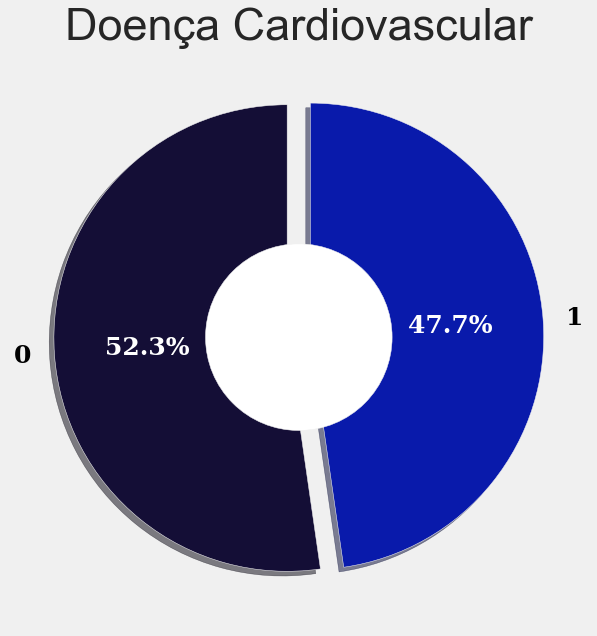

In [15]:
grafico_pizza(dados, 'DCV', ('#140E36', '#091AAB'), (0.05, 0.05), 'Doença Cardiovascular', 25)

**Conclusão**:

O número de observações dos pacientes que não possuem alguma doença cardiovascular é cerca de 5% maior do que os pacientes que apresentam essa enfermidade.

### Idade

Assimetria de Idade: -0.103


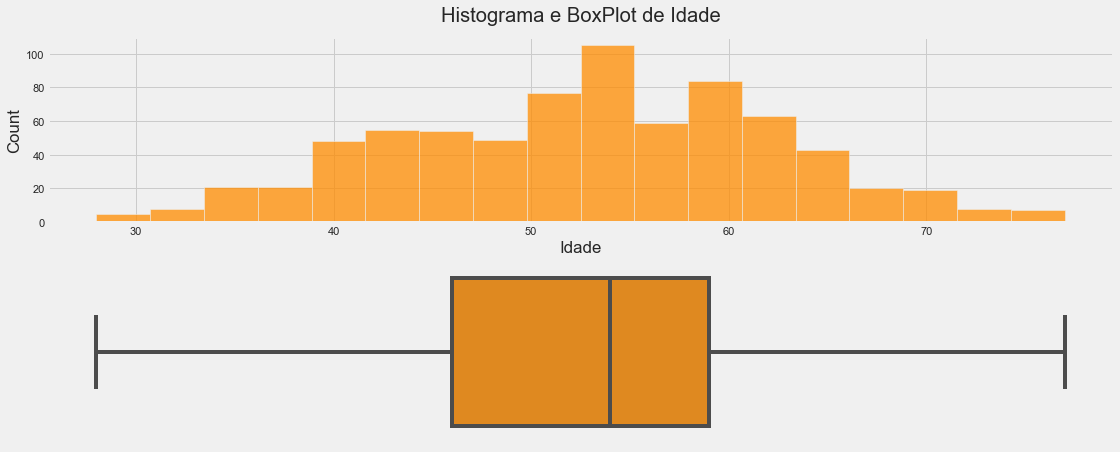

In [16]:
grafico_distribuicao(dados, 'Idade', 'Idade')

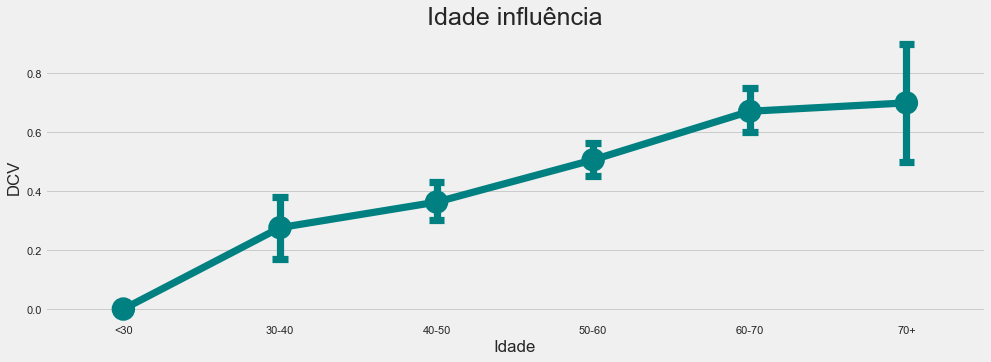

In [17]:
grafico_influencia(dados, 'Idade', [0, 30, 40, 50, 60, 70, 100], ['<30', '30-40', '40-50', '50-60', '60-70', '70+'])

**Conclusão**

Podemos ver a tendência (uma relação linear): com o aumento da idade dos pacientes, o risco de desenvolver alguma doença cardiovascular aumenta. Essa classe de enfermidade tem mais chances de afetar as pessoas a partir de 40 anos.

### Sexo

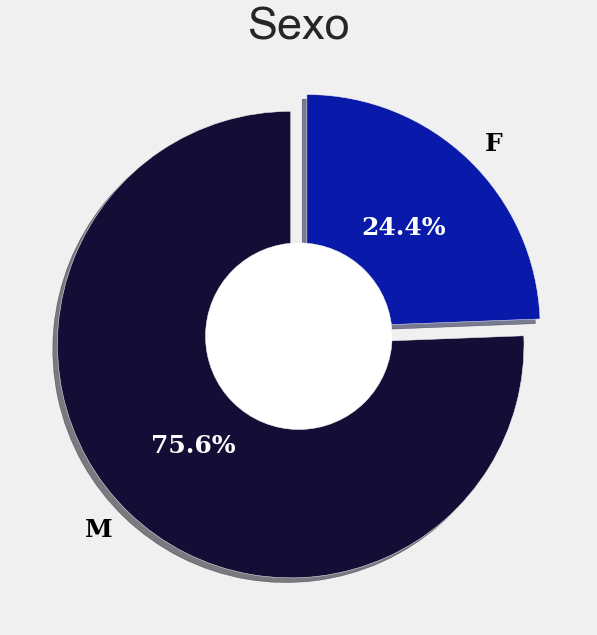

In [18]:
grafico_pizza(dados, 'Sexo', ('#140E36', '#091AAB'), (0.05, 0.05),'Sexo', 25)

### Tipo de dor

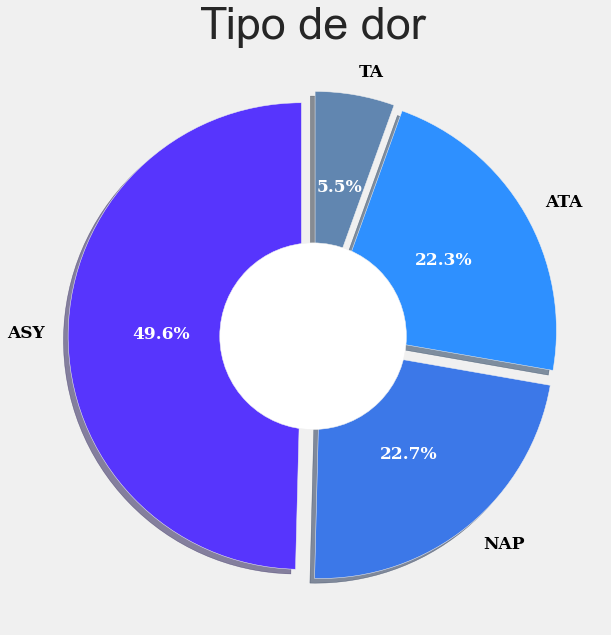

In [19]:
grafico_pizza(dados, 'Tipo de dor', ('#5735FD', '#3C78E8', '#2E90FF', '#6186b0'),
              (0.05, 0.05, 0.05, 0.05), 'Tipo de dor', 17)

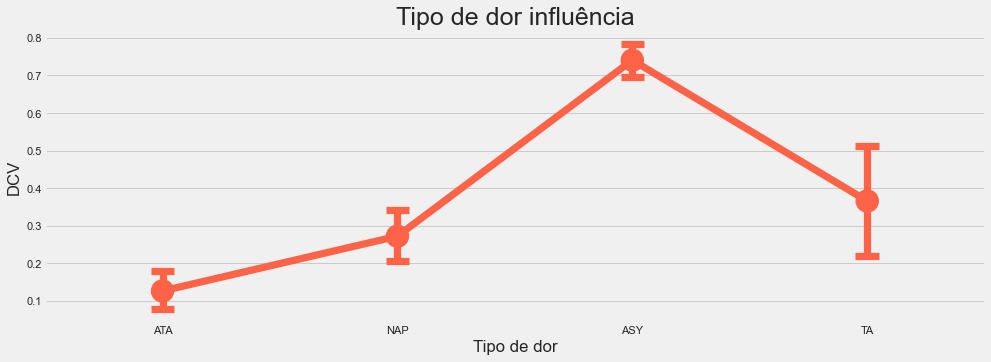

In [20]:
grafico_influencia(dados, 'Tipo de dor', None, None, False)

**Conclusão**

O caso dos pacientes que são assintomáticos, possui uma forte influência na progressão da enfermidade, enquanto uma angina atípica tem menos casos (em média).

### Pressão arterial (mmHg)

Assimetria de Pressão arterial: 0.62


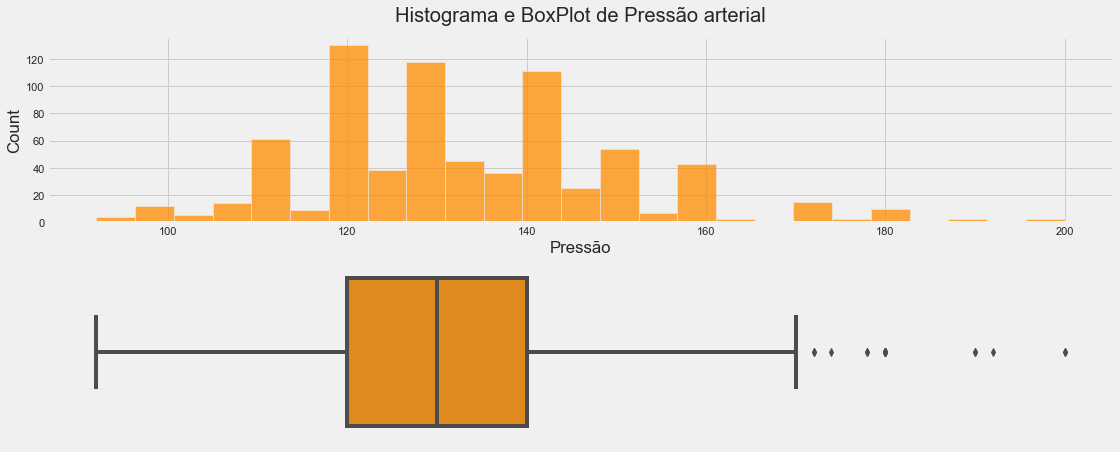

In [21]:
grafico_distribuicao(dados, 'Pressão', 'Pressão arterial')

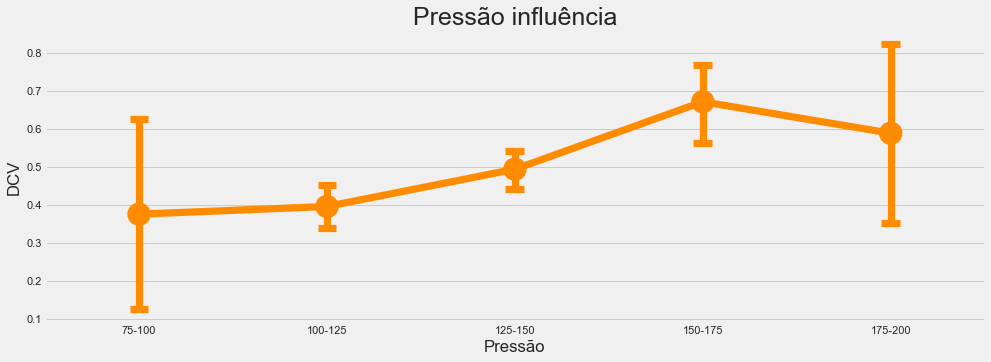

In [22]:
grafico_influencia(dados, 'Pressão', [75, 100, 125, 150, 175, 200], ['75-100', '100-125', '125-150', '150-175', '175-200'])

**Conclusão**

Pacientes com pressão baixa (<=100 mmHg) e pressão alta (>=150 mmHg) tem mais chances de desenvolver algum tipo de doença cardiovascular.

### Colesterol

Assimetria de Colesterol: 1.239


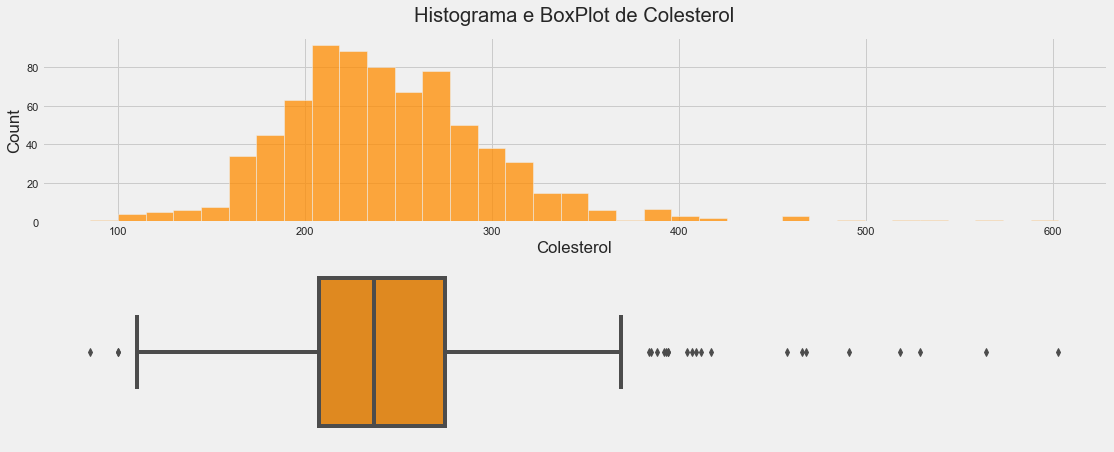

In [23]:
grafico_distribuicao(dados, 'Colesterol', 'Colesterol')

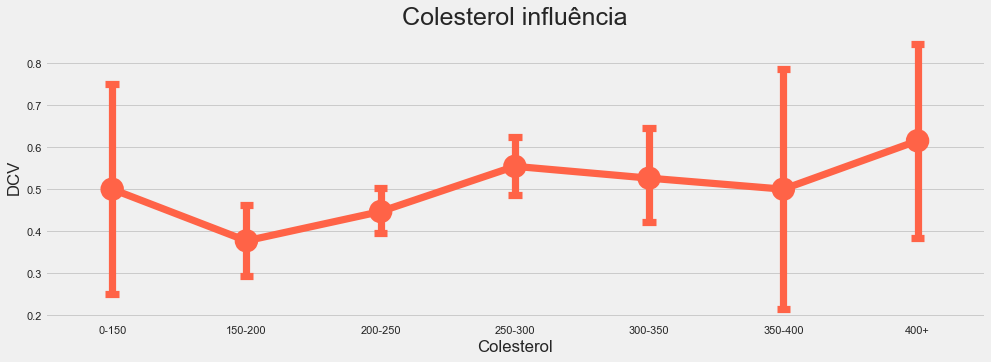

In [24]:
grafico_influencia(dados, 'Colesterol',[0, 150, 200, 250, 300, 350, 400, 1000],
                   ['0-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400+'])

**Conclusão**

Pacientes com colesterol baixo (<=150 mm/dL) e colesterol alto (>=300 mm/dL) possuem maiores chances de desenvolver algum tipo de doença cardiovascular.

### Glicemia

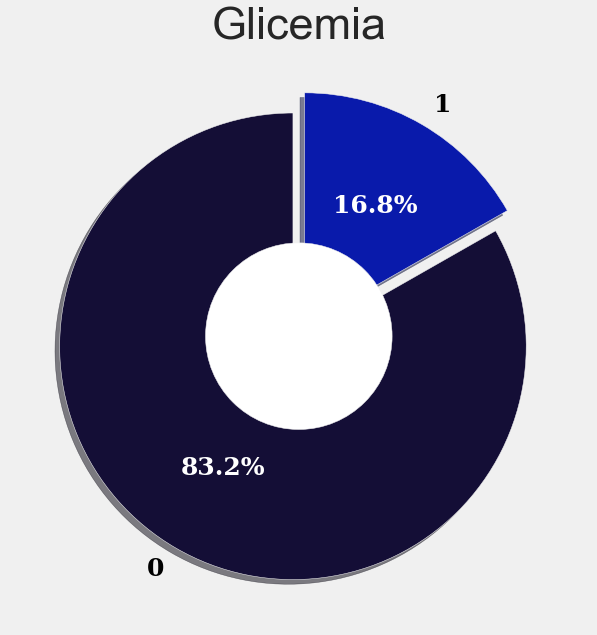

In [25]:
grafico_pizza(dados, 'Glicemia', ('#140E36', '#091AAB'), (0.05, 0.05), 'Glicemia', 25)

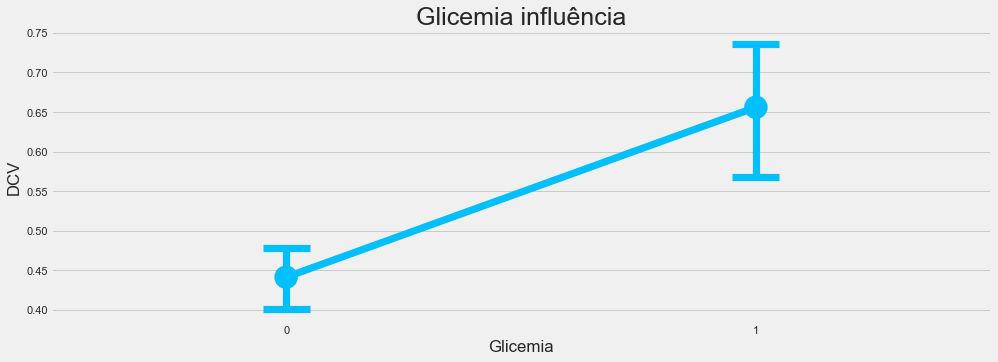

In [26]:
grafico_influencia(dados, 'Glicemia', None, None, False)

**Conclusão**

Pacientes com glicemia maior que 120 mg/dL têm mais chances de desenvolver alguma doença cardiovascular. Já as pessoas que possem a glicemia menor do que 120 mg/dL possuem menos chances de desenvolver alguma DCV.

### Eletro

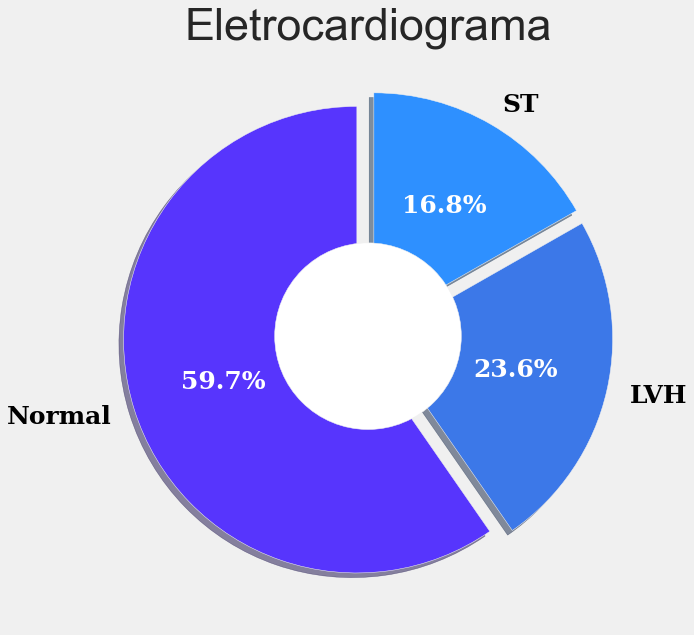

In [27]:
grafico_pizza(dados, 'Eletro', ('#5735FD', '#3C78E8', '#2E90FF'), (0.05, 0.05, 0.05), 'Eletrocardiograma', 25)

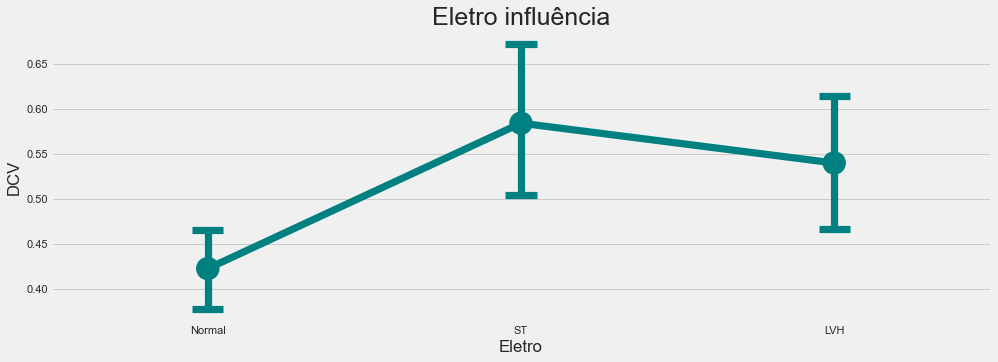

In [28]:
grafico_influencia(dados, 'Eletro', None, None, False)

**Conclusão**

Há maiores chaves de desenvolver alguma doença cardiovascular em pacientes com o segmento ST anormal ou com hipertrofia no ventrículo esquerdo (segundo o critério de Este).

### Batimento cardíado máximo

Assimetria de Batimento Cardíaco Máximo: -0.165


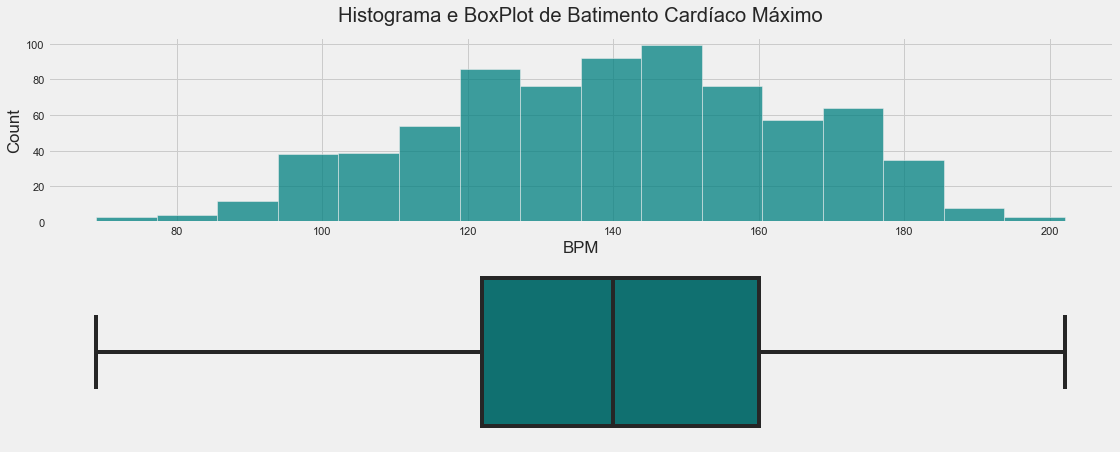

In [29]:
grafico_distribuicao(dados, 'BPM', 'Batimento Cardíaco Máximo')

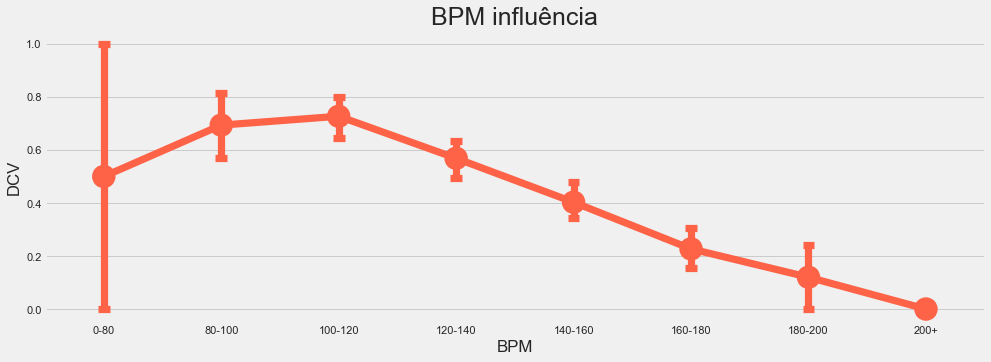

In [30]:
grafico_influencia(dados, 'BPM', [0, 80, 100, 120, 140, 160, 180, 200, 1000],
                   ['0-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '200+'])

**Conclusão**

Como o batimento cardíado máximo é determinado pelo valor fixo de 220 menos a idade do paciente, podemos ver que há uma chance maior de pacientes com batimento cardíaco máximo com valor <=120 BPM, uma vez que quanto mais idosa for a pessoa, menor o valor máximo do batimento cardíaco, consequentemente, aumentando as chances de uma doença cardiovascular.

### Angina por exercício físico

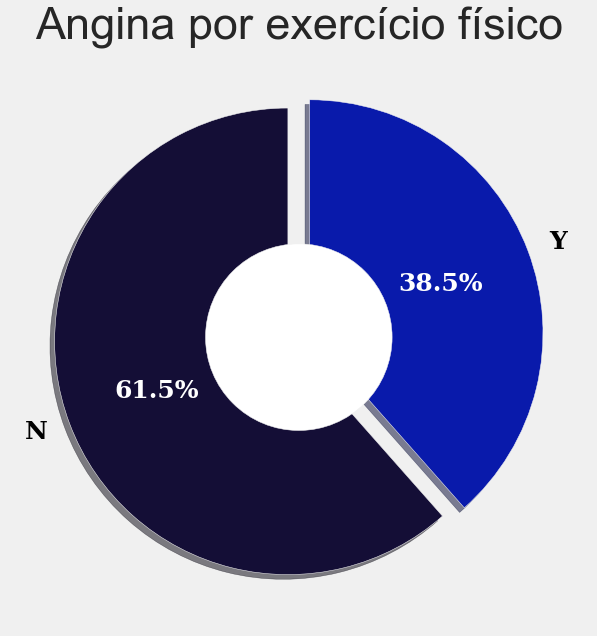

In [31]:
grafico_pizza(dados, 'Dor por exec.', ('#140E36', '#091AAB'), (0.05, 0.05), 'Angina por exercício físico', 25)

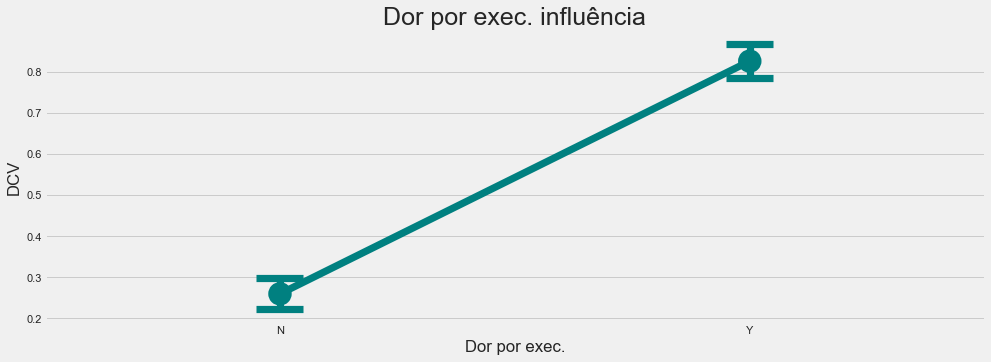

In [32]:
grafico_influencia(dados, 'Dor por exec.', None, None, False)

**Conclusão**

Paciente que reportam angina após atividade física possuem mais chances de densenvolver alguma DCV.

### Oldpeak

Assimetria de Oldpeak: 1.219


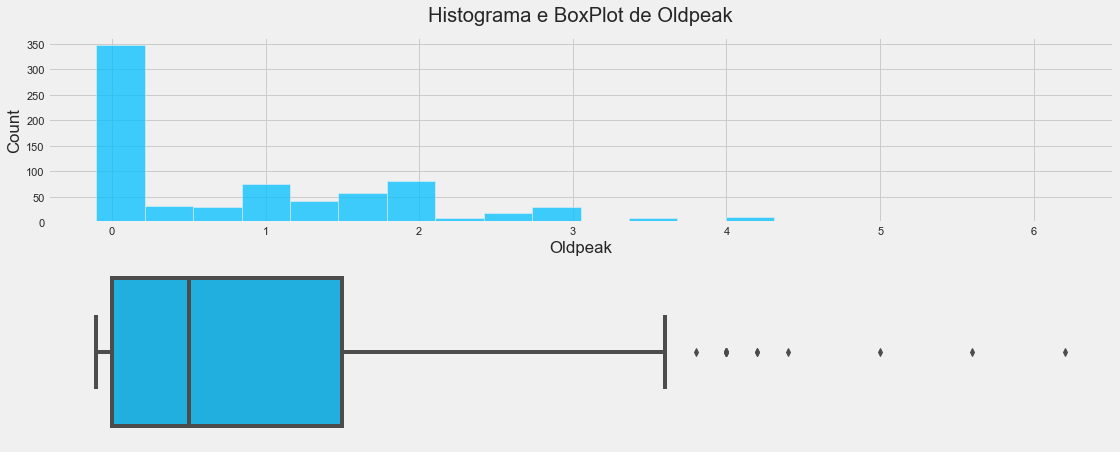

In [33]:
grafico_distribuicao(dados, 'Oldpeak', 'Oldpeak')

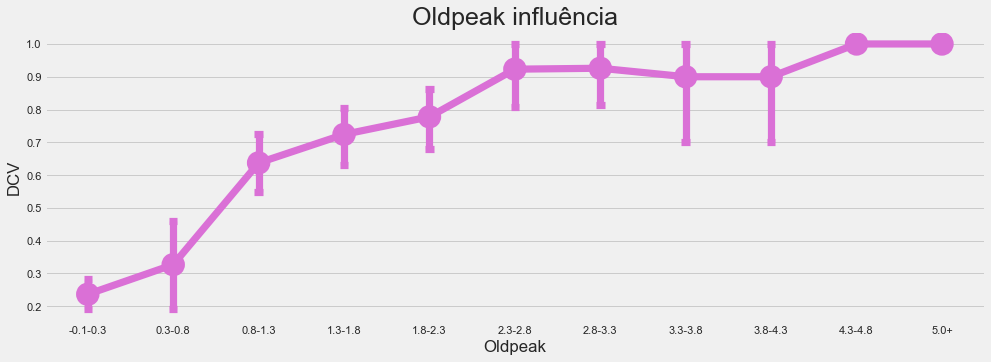

In [34]:
grafico_influencia(dados, 'Oldpeak', [-0.1, 0.3, 0.8, 1.3, 1.8, 2.3, 2.8, 3.3, 3.8, 4.3, 4.8, 7.0],
                   ['-0.1-0.3', '0.3-0.8', '0.8-1.3', '1.3-1.8', '1.8-2.3', '2.3-2.8', '2.8-3.3', '3.3-3.8', '3.8-4.3', '4.3-4.8', '5.0+'])

**Conclusão**

Pacientes com o valor de **Oldpeak** maior que 0,8, têm mais chances de desenvolver alguma doença cardiovascula. Além disso, quanto maior o valor de **Oldpeak**, maiores as chances.

### Inclinação do segmento ST

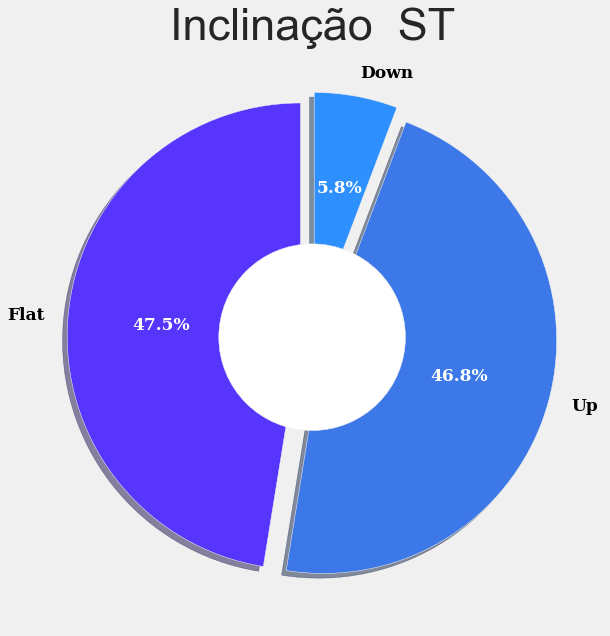

In [35]:
grafico_pizza(dados, 'Incl. ST', ('#5735FD', '#3C78E8', '#2E90FF'), (0.05, 0.05, 0.05), 'Inclinação  ST', 17)

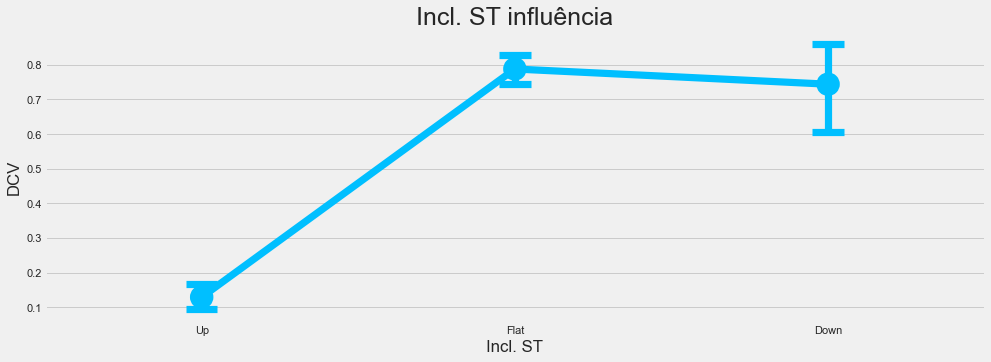

In [36]:
grafico_influencia(dados, 'Incl. ST', None, None, False)

**Conclusão**

Podemos observar que os pacientes que possuem a inclinação do segmento ST como **Flat** ou **Down**, têm chances maiores de desenvolver alguma doença cardiovascular.

### 5. Codificação dos dados

Agora que terminamos a nossa análise dos dados, temos que fazer um passo crucial para usar a nossa Inteligência Artificial (IA). Como nós, a IA também sabe ler; mas somente com valores de números, caso você passe os valores como string para a IA, ela não saberá o que fazer com esse tipo de dado e retornará um erro. Para contornar essa situação, vamos usar a função **LabelEncoder()** do módulo **sklearn**.

In [37]:
from sklearn import preprocessing

In [38]:
# Criar uma lista para armazenar as colunas que possuem o dtype como object
colunas = [coluna for coluna in dados.columns if dados[coluna].dtype == 'object']

# Criar o codificador
codificador = preprocessing.LabelEncoder()

# Codificar cada coluna do conjunto de dados
for coluna in colunas:
    dados[coluna] = codificador.fit_transform(dados[coluna])

Para ver como ficou, basta chamar o conjunto de dados.

In [39]:
dados

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,Oldpeak,Incl. ST,DCV
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


### 6. Análise exploratória

A análise exploratória serve para que possamos ver graficamente qual é a correlação entre os dados. Saber mais a fundo como que um dado influencia no outro.

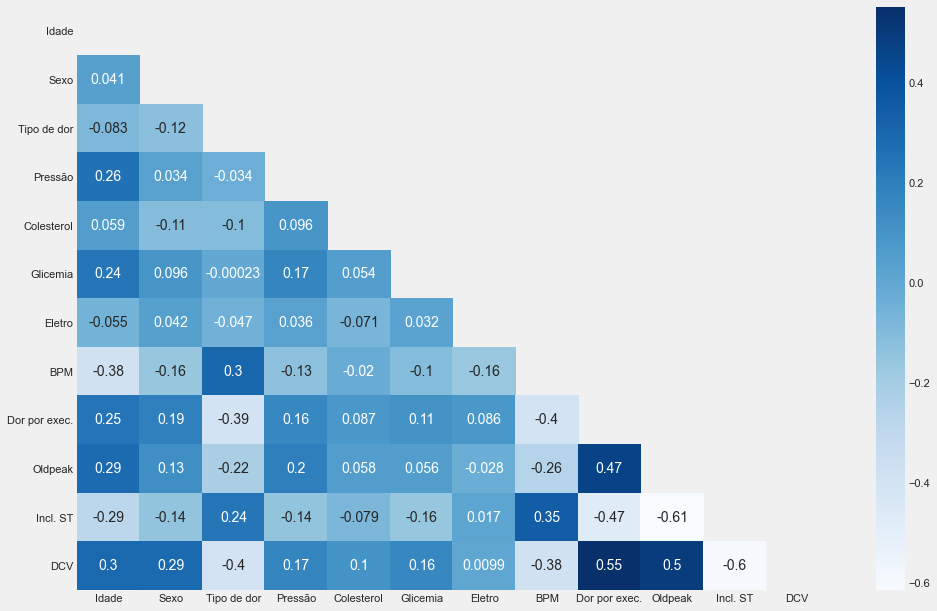

In [40]:
# Dimensões da plotagem
plt.figure(figsize=(15, 10))

# Criar a máscara para mostrar somente a metade das correlações
mascara = np.triu(dados.corr())

# Criar o heatmap (mapa de calor)
sns.heatmap(data=dados.corr(), cmap='Blues', mask=mascara, annot=True)

# Mostrar o heatmap
plt.show()

Essa análise com o mapa de calor (*heat map*) deixa bem mais fácil a visualização e entendimento de como os dados se correlacionam. Uma forma bem simples de entender o que os números querem dizer é que quanto mais perto de **1**; maior é a correlação entre os dados, isto é: se um dado aumenta, o outro também aumenta, e se um dado diminui o outro também diminui. Quanto mais próximo de **-1**; menor é a correlação entre os dados, isto é: se um dado aumenta, o outro diminui, e se um dado diminui o outro também diminui. Essa análise serve também como uma ferramenta para ver se os dados fazem sentido e se estamos indo pelo caminho certo.

### 7. Modelagem do Aprendizado de Máquina (ou Inteligência Artificial)

Nesta etapa precisamos separar os dados em dois grupos: o primeiro sendo os dados com todas as informações dos pacientes e o segundo, somente a coluna com o resultado; que no caso é a coluna **DCV**, uma vez que é ela o resultado final que queremos (não adianta entregar a resposta junto com a pergunta né?). Para isso, separaremos em duas variáveis: o primeiro grupo sendo o **X** e o segundo sendo o **y**. Usaremos essas notações já que é algo padrão usado no Aprendizado de Máquina.

In [41]:
# Separar os dados em dois grupos
X = dados.drop(['DCV'], axis=1)
y = dados['DCV']

Agora vamos separar os dados em *dados de treino* e *dados de teste*. Separá-los serve para que a Inteligência Artificial (IA) não tenha um *overfit*. Esse termo é usado quando uma IA se sai muito bem com os dados de treino, mas quando analisa os dados de teste, ou seja, dados que ela nunca viu, ela se sai bem péssima. É a mesma coisa quando você faz uma prova, você estuda antes com os exercícios para que se saia bem na avaliação, já que essa avaliação possui questões semelhantes as que você estdou, mas não iguais. Se forem as mesmas questões do estudo e da prova, qual a certeza de que você realmente aprendeu a matéria? Isso vale para a IA! Então separamos uma quantidade aleatória de dados para que a IA treine e se saia bem com os dados de teste, esses que ela nunca viu.

Para que isso seja feito, vamos usar a função **train_test_split()** do módulo ***sklearn***.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Informar os arrays para a separação, nesse caso X & y
# Informar o tamanho do conjunto de treino, nesse caso é de 70% dos dados serão para o treino da IA
# Informar o parâmetro "random_state" como 0 para que seja sempre os mesmos dados a serem usados quando for
# reproduzir novamente o treinamento da IA
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.7, random_state=0)

Com os dados separados em treino e teste, vamos usar três algoritmos de Aprendizado de Máquina e ver qual deles é o melhor. São eles:

- Random Forest Classifier;


- kNN (K-Nearest Neighbours) e;


- Gradient Boosting Classifier

Todos esses algoritmos estão presentes no módulo ***sklearn***.

In [44]:
# Importar os modelos de Aprendizado de Máquina
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [45]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=500, max_depth=70, max_features=2, random_state=0)

# kNN
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', weights='uniform', n_jobs=-1)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                                 max_features=2, n_estimators=500, random_state=0)

Com os algoritmos montados, basta treiná-los com o método **fit()**. Os parêmetros usados são o **X_treino** e **y_treino**. As células a seguir podem demorar para ficarem prontas e exigem uma certa capacidade do processador, então aconcelho que somente o Notebook Jupyter esteja aberto em seu computador.

In [46]:
# Treinar o Random Forest Classifier
rfc.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=70, max_features=2, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [47]:
# Treinar o kNN
knn.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [48]:
# Treinar o Gradient Boosting Classifier
gbc.fit(X_treino, y_treino)

GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                           max_features=2, n_estimators=500, random_state=0)

Com os modelos treinados, vejamos como eles se saem com os dados de teste. Lembre-se que esses dados as IAs nunca viram. Vamos analisar a matriz de confusão de cada modelo. Essa matriz serve para observar a taxa de acertos e erros da IA. Para ver essa matriz, chame a função **confusion_matrix** do módulo ***sklearn***.

Além de analisar a matriz de confusão de cada classificador, vamos ver sua acurácia, precisão, revocação e pontuação F1. Mas que raios é tudo isso aí? Vamos ver cada um e qual a sua finalidade.

- **Acurácia**: A pergunta que a acurácia responde é: no geral, o quão frequente o classificador está correto? A acurácia é definida por:

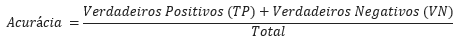

- **Precisão**: A pergunta que a precisão responde é: daqueles que foram classificados como corretos, quantos efetivmente são corretos? A precisão é definida por:

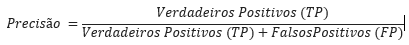

- **Revocação**: A pergunta que a revocação responde é: quando realmente é da classe X, o quão frequente é classificado como X?. A revocação é definida por:

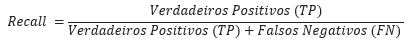

- **Pontuação F1**: Essa métrica combina a precisão e a revocação para que haja um número único que indique a qualidade geral do modelo. A pontuação F1 é definida por:

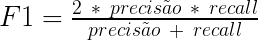

Agora que já conhecemos quais são as métricas, vamos importá-las do módulo ***sklearn***.

In [49]:
# Importar a matriz de confusão e as métricas de avaliação
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [50]:
# Para avaliar as métricas e a matriz de confusão, vamos criar uma função para facilitar a nossa vida
def metricas(X_teste, y_teste, classificador, nome_clf):
    # Prever o resultado
    y_pred = classificador.predict(X_teste)
    
    # Métrica de acurácia
    acuracia = accuracy_score(y_teste, y_pred)
    
    # Métrica de precisão
    precisao = precision_score(y_teste, y_pred)
    
    # Métrica de revocação
    revocacao = recall_score(y_teste, y_pred)
    
    # Métrica de pontuação F1
    f1 = f1_score(y_teste, y_pred)
    
    # Mostrar os valores das métricas
    print(f'''{nome_clf}

Acurácia: {acuracia:.3f}

Precisão: {precisao:.3f}

Revocação: {revocacao:.3f}

Pontuação F1: {f1:.3f}''')
    
    # Criar a matriz de confusão
    matriz = confusion_matrix(y_teste, y_pred)
    
    # Criar um DataFrame para aramazenar os dados de "y_pred" e "y_teste"
    df_mc = pd.DataFrame(matriz, index=['DCV', 'Normal'], columns=['DCV', 'Normal'])
    
    # Determinar o tamanho da plotagem
    plt.figure(figsize=(15, 10))
    
    # Criar a plotagem
    mapa_calor = sns.heatmap(data=df_mc,
                            annot=True,
                            cmap='Blues',
                            fmt='.5g',
                            annot_kws={'size': 20})
    
    # Colocar o título da matriz de confusão
    mapa_calor.set_title(f'Matriz de Confusão {nome_clf}', fontsize=25, y=1.05)
    
    # Adicionar a legenda nos eixos
    plt.xlabel('Valores Previstos', fontsize=20)
    plt.ylabel('Valores Reais', fontsize=20)
    
    # Mostrar a matriz de confusão
    plt.show()

Random Forest Classifier

Acurácia: 0.866

Precisão: 0.855

Revocação: 0.870

Pontuação F1: 0.862


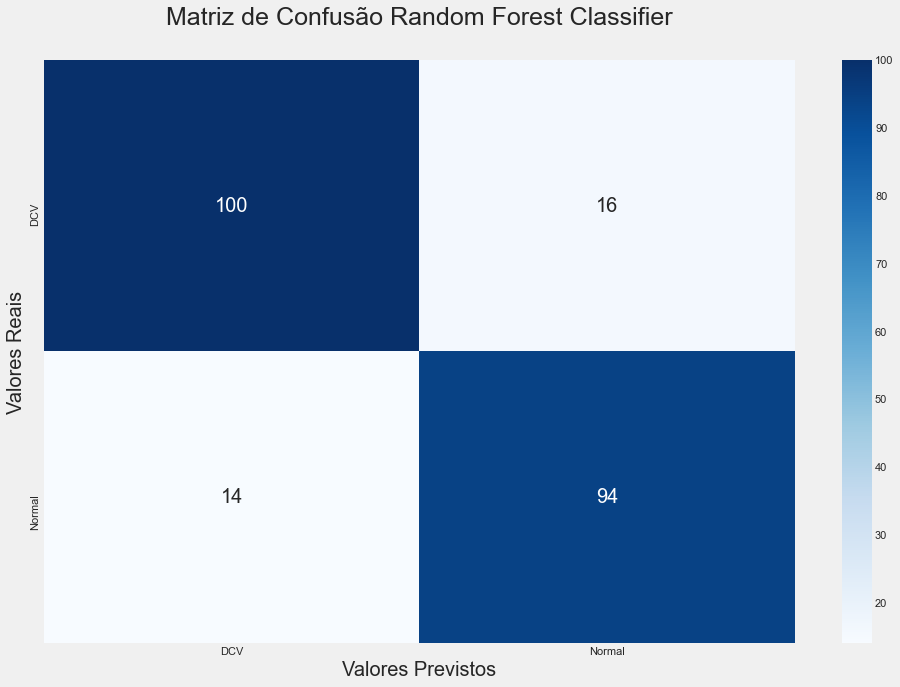

In [51]:
# Mostrar as métricas e a matriz de confusão de Random Forest Classifier
metricas(X_teste, y_teste, rfc, 'Random Forest Classifier')

kNN

Acurácia: 0.643

Precisão: 0.637

Revocação: 0.602

Pontuação F1: 0.619


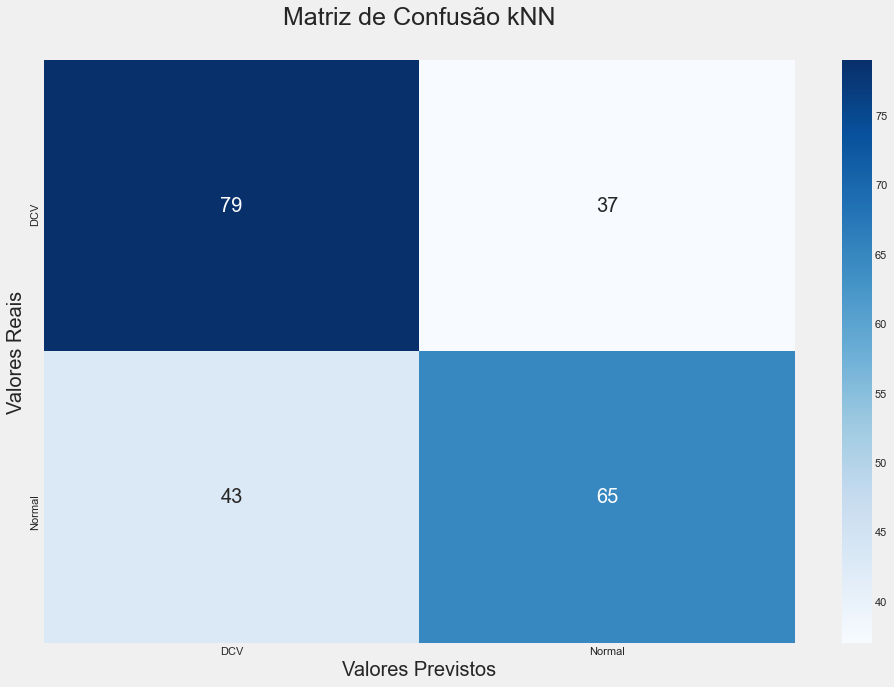

In [52]:
# Mostrar as métricas e a matriz de confusão de kNN
metricas(X_teste, y_teste, knn, 'kNN')

Gradient Boosting Classifier

Acurácia: 0.857

Precisão: 0.839

Revocação: 0.870

Pontuação F1: 0.855


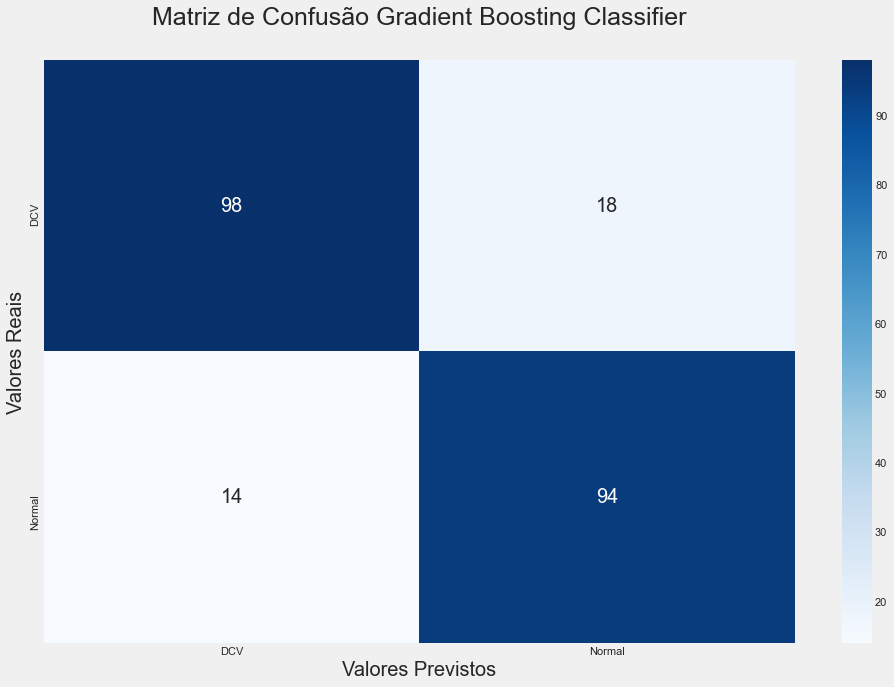

In [53]:
# Mostrar as métricas e a matriz de confusão de Gradient Boosting Classifier
metricas(X_teste, y_teste, gbc, 'Gradient Boosting Classifier')

Para entender a matriz de confusão, veja a imagem abaixo:

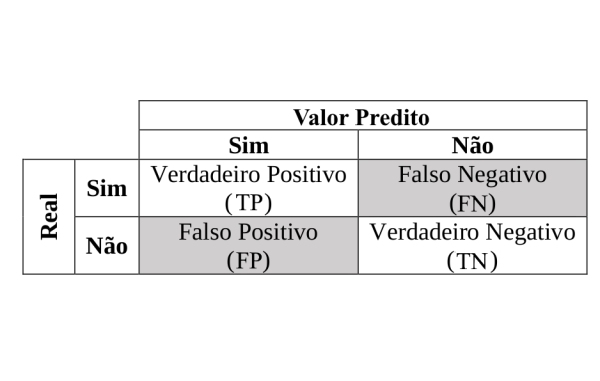

Para simplificar (ou tentar rsrsrs):

- Verdadeiro positivo (TP): a IA previu **1** e o real também é **1**.


- Falso positivo (FP): a IA previu **1** mas o real é **0**.


- Falso negativo (FN): a IA previu **0** mas o real é **1**.


- Verdadeiro negativo (TN): a IA previu **0** e o real também oe **0**.

### 8. Conclusões finais

Dentre os três modelos de Aprendizado de Máquina, o melhor foi o **Random Forest Classifier**. Vamos analisar as pontuações de suas métricas:

- **Acurácia**: Em 86,6% dos casos o modelo acerta.


- **Precisão**: Em 85,5% dos casos o modelo tem certeza do resultado que entrega.


- **Revocação**: Em 87% dos casos o modelo prevê a classe e realmente é a classe prevista.


- **Pontuação F1**: A precisão e revocação do modelo estão de acordo em 86,2% dos casos.


Um valor de 85,5% de precisão já é um bom começo para um modelo de Inteligência Artificial para ajudar as pessoas que possam vir a desenvolver algum tipo de doença cardiovascular, uma vez que 85,5% de chances de prever essa enfermidade é melhor do que ficar a deriva somente com os 50%: "será que terei alguma doença cardiovascular ou não?".